In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_new2threshold_fixedhurst.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_new2threshold_fixedhurst.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_new2threshold_fixedhurst.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853


In [5]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853
Cascade length:  2758
New Orders left:  1909095
making new cascade


OG Orders left:  1909095
Cascade length:  2812
New Orders left:  1906283
making new cascade


OG Orders left:  1906283
Cascade length:  2669
New Orders left:  1903614
making new cascade


OG Orders left:  1903614
Cascade length:  3050
New Orders left:  1900564
making new cascade


OG Orders left:  1900564
Cascade length:  2924
New Orders left:  1897640
making new cascade


OG Orders left:  1897640
Cascade length:  6
New Orders left:  1897634
making new cascade


OG Orders left:  1897634
Cascade length:  2718
New Orders left:  1894916
making new cascade


OG Orders left:  1894916
Cascade length:  2509
New Orders left:  1892407
making new cascade


OG Orders left:  1892407
Cascade length:  1851
New Orders left:  1890556
making new cascade


OG Orders left:  1890556
Cascade length:  1
New Orders left:  1890555
making new cascade


OG Orders left:  1890555
Cascade length:  2411
New Orders left:  1

Cascade length:  1541
New Orders left:  1767483
making new cascade


OG Orders left:  1767483
Cascade length:  1038
New Orders left:  1766445
making new cascade


OG Orders left:  1766445
Cascade length:  1040
New Orders left:  1765405
making new cascade


OG Orders left:  1765405
Cascade length:  1597
New Orders left:  1763808
making new cascade


OG Orders left:  1763808
Cascade length:  5
New Orders left:  1763803
making new cascade


OG Orders left:  1763803
Cascade length:  1070
New Orders left:  1762733
making new cascade


OG Orders left:  1762733
Cascade length:  1556
New Orders left:  1761177
making new cascade


OG Orders left:  1761177
Cascade length:  3
New Orders left:  1761174
making new cascade


OG Orders left:  1761174
Cascade length:  9
New Orders left:  1761165
making new cascade


OG Orders left:  1761165
Cascade length:  1459
New Orders left:  1759706
making new cascade


OG Orders left:  1759706
Cascade length:  66
New Orders left:  1759640
making new cascade


OG

Cascade length:  1243
New Orders left:  1694071
making new cascade


OG Orders left:  1694071
Cascade length:  44
New Orders left:  1694027
making new cascade


OG Orders left:  1694027
Cascade length:  849
New Orders left:  1693178
making new cascade


OG Orders left:  1693178
Cascade length:  1288
New Orders left:  1691890
making new cascade


OG Orders left:  1691890
Cascade length:  1068
New Orders left:  1690822
making new cascade


OG Orders left:  1690822
Cascade length:  635
New Orders left:  1690187
making new cascade


OG Orders left:  1690187
Cascade length:  21
New Orders left:  1690166
making new cascade


OG Orders left:  1690166
Cascade length:  985
New Orders left:  1689181
making new cascade


OG Orders left:  1689181
Cascade length:  1
New Orders left:  1689180
making new cascade


OG Orders left:  1689180
Cascade length:  7
New Orders left:  1689173
making new cascade


OG Orders left:  1689173
Cascade length:  1155
New Orders left:  1688018
making new cascade


OG O

Cascade length:  28
New Orders left:  1637588
making new cascade


OG Orders left:  1637588
Cascade length:  2
New Orders left:  1637586
making new cascade


OG Orders left:  1637586
Cascade length:  1
New Orders left:  1637585
making new cascade


OG Orders left:  1637585
Cascade length:  3
New Orders left:  1637582
making new cascade


OG Orders left:  1637582
Cascade length:  79
New Orders left:  1637503
making new cascade


OG Orders left:  1637503
Cascade length:  1
New Orders left:  1637502
making new cascade


OG Orders left:  1637502
Cascade length:  1428
New Orders left:  1636074
making new cascade


OG Orders left:  1636074
Cascade length:  4
New Orders left:  1636070
making new cascade


OG Orders left:  1636070
Cascade length:  1069
New Orders left:  1635001
making new cascade


OG Orders left:  1635001
Cascade length:  805
New Orders left:  1634196
making new cascade


OG Orders left:  1634196
Cascade length:  875
New Orders left:  1633321
making new cascade


OG Orders le

Cascade length:  4
New Orders left:  1601004
making new cascade


OG Orders left:  1601004
Cascade length:  240
New Orders left:  1600764
making new cascade


OG Orders left:  1600764
Cascade length:  2
New Orders left:  1600762
making new cascade


OG Orders left:  1600762
Cascade length:  497
New Orders left:  1600265
making new cascade


OG Orders left:  1600265
Cascade length:  65
New Orders left:  1600200
making new cascade


OG Orders left:  1600200
Cascade length:  2
New Orders left:  1600198
making new cascade


OG Orders left:  1600198
Cascade length:  1
New Orders left:  1600197
making new cascade


OG Orders left:  1600197
Cascade length:  134
New Orders left:  1600063
making new cascade


OG Orders left:  1600063
Cascade length:  773
New Orders left:  1599290
making new cascade


OG Orders left:  1599290
Cascade length:  43
New Orders left:  1599247
making new cascade


OG Orders left:  1599247
Cascade length:  4
New Orders left:  1599243
making new cascade


OG Orders left

Cascade length:  1072
New Orders left:  1570224
making new cascade


OG Orders left:  1570224
Cascade length:  85
New Orders left:  1570139
making new cascade


OG Orders left:  1570139
Cascade length:  628
New Orders left:  1569511
making new cascade


OG Orders left:  1569511
Cascade length:  3
New Orders left:  1569508
making new cascade


OG Orders left:  1569508
Cascade length:  311
New Orders left:  1569197
making new cascade


OG Orders left:  1569197
Cascade length:  1448
New Orders left:  1567749
making new cascade


OG Orders left:  1567749
Cascade length:  2
New Orders left:  1567747
making new cascade


OG Orders left:  1567747
Cascade length:  25
New Orders left:  1567722
making new cascade


OG Orders left:  1567722
Cascade length:  652
New Orders left:  1567070
making new cascade


OG Orders left:  1567070
Cascade length:  2
New Orders left:  1567068
making new cascade


OG Orders left:  1567068
Cascade length:  4
New Orders left:  1567064
making new cascade


OG Orders 

Cascade length:  1483
New Orders left:  1533162
making new cascade


OG Orders left:  1533162
Cascade length:  16
New Orders left:  1533146
making new cascade


OG Orders left:  1533146
Cascade length:  1275
New Orders left:  1531871
making new cascade


OG Orders left:  1531871
Cascade length:  530
New Orders left:  1531341
making new cascade


OG Orders left:  1531341
Cascade length:  1068
New Orders left:  1530273
making new cascade


OG Orders left:  1530273
Cascade length:  1088
New Orders left:  1529185
making new cascade


OG Orders left:  1529185
Cascade length:  16
New Orders left:  1529169
making new cascade


OG Orders left:  1529169
Cascade length:  1352
New Orders left:  1527817
making new cascade


OG Orders left:  1527817
Cascade length:  1162
New Orders left:  1526655
making new cascade


OG Orders left:  1526655
Cascade length:  1
New Orders left:  1526654
making new cascade


OG Orders left:  1526654
Cascade length:  41
New Orders left:  1526613
making new cascade


O

Cascade length:  11
New Orders left:  1478645
making new cascade


OG Orders left:  1478645
Cascade length:  4
New Orders left:  1478641
making new cascade


OG Orders left:  1478641
Cascade length:  725
New Orders left:  1477916
making new cascade


OG Orders left:  1477916
Cascade length:  1270
New Orders left:  1476646
making new cascade


OG Orders left:  1476646
Cascade length:  1171
New Orders left:  1475475
making new cascade


OG Orders left:  1475475
Cascade length:  1291
New Orders left:  1474184
making new cascade


OG Orders left:  1474184
Cascade length:  4
New Orders left:  1474180
making new cascade


OG Orders left:  1474180
Cascade length:  9
New Orders left:  1474171
making new cascade


OG Orders left:  1474171
Cascade length:  17
New Orders left:  1474154
making new cascade


OG Orders left:  1474154
Cascade length:  1592
New Orders left:  1472562
making new cascade


OG Orders left:  1472562
Cascade length:  6
New Orders left:  1472556
making new cascade


OG Order

Cascade length:  30
New Orders left:  1432481
making new cascade


OG Orders left:  1432481
Cascade length:  110
New Orders left:  1432371
making new cascade


OG Orders left:  1432371
Cascade length:  1504
New Orders left:  1430867
making new cascade


OG Orders left:  1430867
Cascade length:  1197
New Orders left:  1429670
making new cascade


OG Orders left:  1429670
Cascade length:  833
New Orders left:  1428837
making new cascade


OG Orders left:  1428837
Cascade length:  24
New Orders left:  1428813
making new cascade


OG Orders left:  1428813
Cascade length:  807
New Orders left:  1428006
making new cascade


OG Orders left:  1428006
Cascade length:  1273
New Orders left:  1426733
making new cascade


OG Orders left:  1426733
Cascade length:  780
New Orders left:  1425953
making new cascade


OG Orders left:  1425953
Cascade length:  896
New Orders left:  1425057
making new cascade


OG Orders left:  1425057
Cascade length:  22
New Orders left:  1425035
making new cascade


OG

Cascade length:  1459
New Orders left:  1381808
making new cascade


OG Orders left:  1381808
Cascade length:  970
New Orders left:  1380838
making new cascade


OG Orders left:  1380838
Cascade length:  4
New Orders left:  1380834
making new cascade


OG Orders left:  1380834
Cascade length:  781
New Orders left:  1380053
making new cascade


OG Orders left:  1380053
Cascade length:  1
New Orders left:  1380052
making new cascade


OG Orders left:  1380052
Cascade length:  628
New Orders left:  1379424
making new cascade


OG Orders left:  1379424
Cascade length:  1282
New Orders left:  1378142
making new cascade


OG Orders left:  1378142
Cascade length:  862
New Orders left:  1377280
making new cascade


OG Orders left:  1377280
Cascade length:  12
New Orders left:  1377268
making new cascade


OG Orders left:  1377268
Cascade length:  1352
New Orders left:  1375916
making new cascade


OG Orders left:  1375916
Cascade length:  172
New Orders left:  1375744
making new cascade


OG O

Cascade length:  1195
New Orders left:  1333880
making new cascade


OG Orders left:  1333880
Cascade length:  8
New Orders left:  1333872
making new cascade


OG Orders left:  1333872
Cascade length:  1261
New Orders left:  1332611
making new cascade


OG Orders left:  1332611
Cascade length:  840
New Orders left:  1331771
making new cascade


OG Orders left:  1331771
Cascade length:  517
New Orders left:  1331254
making new cascade


OG Orders left:  1331254
Cascade length:  1389
New Orders left:  1329865
making new cascade


OG Orders left:  1329865
Cascade length:  17
New Orders left:  1329848
making new cascade


OG Orders left:  1329848
Cascade length:  1164
New Orders left:  1328684
making new cascade


OG Orders left:  1328684
Cascade length:  9
New Orders left:  1328675
making new cascade


OG Orders left:  1328675
Cascade length:  1347
New Orders left:  1327328
making new cascade


OG Orders left:  1327328
Cascade length:  1574
New Orders left:  1325754
making new cascade


O

Cascade length:  1908
New Orders left:  1276756
making new cascade


OG Orders left:  1276756
Cascade length:  137
New Orders left:  1276619
making new cascade


OG Orders left:  1276619
Cascade length:  131
New Orders left:  1276488
making new cascade


OG Orders left:  1276488
Cascade length:  37
New Orders left:  1276451
making new cascade


OG Orders left:  1276451
Cascade length:  1915
New Orders left:  1274536
making new cascade


OG Orders left:  1274536
Cascade length:  830
New Orders left:  1273706
making new cascade


OG Orders left:  1273706
Cascade length:  32
New Orders left:  1273674
making new cascade


OG Orders left:  1273674
Cascade length:  45
New Orders left:  1273629
making new cascade


OG Orders left:  1273629
Cascade length:  1639
New Orders left:  1271990
making new cascade


OG Orders left:  1271990
Cascade length:  1490
New Orders left:  1270500
making new cascade


OG Orders left:  1270500
Cascade length:  788
New Orders left:  1269712
making new cascade


O

Cascade length:  1016
New Orders left:  1221731
making new cascade


OG Orders left:  1221731
Cascade length:  1476
New Orders left:  1220255
making new cascade


OG Orders left:  1220255
Cascade length:  10
New Orders left:  1220245
making new cascade


OG Orders left:  1220245
Cascade length:  1637
New Orders left:  1218608
making new cascade


OG Orders left:  1218608
Cascade length:  1118
New Orders left:  1217490
making new cascade


OG Orders left:  1217490
Cascade length:  4
New Orders left:  1217486
making new cascade


OG Orders left:  1217486
Cascade length:  829
New Orders left:  1216657
making new cascade


OG Orders left:  1216657
Cascade length:  947
New Orders left:  1215710
making new cascade


OG Orders left:  1215710
Cascade length:  5
New Orders left:  1215705
making new cascade


OG Orders left:  1215705
Cascade length:  6
New Orders left:  1215699
making new cascade


OG Orders left:  1215699
Cascade length:  1076
New Orders left:  1214623
making new cascade


OG O

Cascade length:  8
New Orders left:  1171405
making new cascade


OG Orders left:  1171405
Cascade length:  1
New Orders left:  1171404
making new cascade


OG Orders left:  1171404
Cascade length:  23
New Orders left:  1171381
making new cascade


OG Orders left:  1171381
Cascade length:  1242
New Orders left:  1170139
making new cascade


OG Orders left:  1170139
Cascade length:  975
New Orders left:  1169164
making new cascade


OG Orders left:  1169164
Cascade length:  1432
New Orders left:  1167732
making new cascade


OG Orders left:  1167732
Cascade length:  531
New Orders left:  1167201
making new cascade


OG Orders left:  1167201
Cascade length:  1843
New Orders left:  1165358
making new cascade


OG Orders left:  1165358
Cascade length:  14
New Orders left:  1165344
making new cascade


OG Orders left:  1165344
Cascade length:  56
New Orders left:  1165288
making new cascade


OG Orders left:  1165288
Cascade length:  41
New Orders left:  1165247
making new cascade


OG Orde

Cascade length:  1194
New Orders left:  1106194
making new cascade


OG Orders left:  1106194
Cascade length:  1319
New Orders left:  1104875
making new cascade


OG Orders left:  1104875
Cascade length:  913
New Orders left:  1103962
making new cascade


OG Orders left:  1103962
Cascade length:  93
New Orders left:  1103869
making new cascade


OG Orders left:  1103869
Cascade length:  727
New Orders left:  1103142
making new cascade


OG Orders left:  1103142
Cascade length:  1492
New Orders left:  1101650
making new cascade


OG Orders left:  1101650
Cascade length:  896
New Orders left:  1100754
making new cascade


OG Orders left:  1100754
Cascade length:  1313
New Orders left:  1099441
making new cascade


OG Orders left:  1099441
Cascade length:  870
New Orders left:  1098571
making new cascade


OG Orders left:  1098571
Cascade length:  602
New Orders left:  1097969
making new cascade


OG Orders left:  1097969
Cascade length:  1
New Orders left:  1097968
making new cascade


O

Cascade length:  71
New Orders left:  1048586
making new cascade


OG Orders left:  1048586
Cascade length:  1114
New Orders left:  1047472
making new cascade


OG Orders left:  1047472
Cascade length:  1214
New Orders left:  1046258
making new cascade


OG Orders left:  1046258
Cascade length:  997
New Orders left:  1045261
making new cascade


OG Orders left:  1045261
Cascade length:  1026
New Orders left:  1044235
making new cascade


OG Orders left:  1044235
Cascade length:  855
New Orders left:  1043380
making new cascade


OG Orders left:  1043380
Cascade length:  1305
New Orders left:  1042075
making new cascade


OG Orders left:  1042075
Cascade length:  29
New Orders left:  1042046
making new cascade


OG Orders left:  1042046
Cascade length:  1288
New Orders left:  1040758
making new cascade


OG Orders left:  1040758
Cascade length:  261
New Orders left:  1040497
making new cascade


OG Orders left:  1040497
Cascade length:  20
New Orders left:  1040477
making new cascade




Cascade length:  1
New Orders left:  984375
making new cascade


OG Orders left:  984375
Cascade length:  960
New Orders left:  983415
making new cascade


OG Orders left:  983415
Cascade length:  739
New Orders left:  982676
making new cascade


OG Orders left:  982676
Cascade length:  10
New Orders left:  982666
making new cascade


OG Orders left:  982666
Cascade length:  694
New Orders left:  981972
making new cascade


OG Orders left:  981972
Cascade length:  7
New Orders left:  981965
making new cascade


OG Orders left:  981965
Cascade length:  880
New Orders left:  981085
making new cascade


OG Orders left:  981085
Cascade length:  1487
New Orders left:  979598
making new cascade


OG Orders left:  979598
Cascade length:  1215
New Orders left:  978383
making new cascade


OG Orders left:  978383
Cascade length:  1638
New Orders left:  976745
making new cascade


OG Orders left:  976745
Cascade length:  1006
New Orders left:  975739
making new cascade


OG Orders left:  975739


Cascade length:  1060
New Orders left:  889821
making new cascade


OG Orders left:  889821
Cascade length:  1688
New Orders left:  888133
making new cascade


OG Orders left:  888133
Cascade length:  1390
New Orders left:  886743
making new cascade


OG Orders left:  886743
Cascade length:  1555
New Orders left:  885188
making new cascade


OG Orders left:  885188
Cascade length:  464
New Orders left:  884724
making new cascade


OG Orders left:  884724
Cascade length:  1210
New Orders left:  883514
making new cascade


OG Orders left:  883514
Cascade length:  1185
New Orders left:  882329
making new cascade


OG Orders left:  882329
Cascade length:  33
New Orders left:  882296
making new cascade


OG Orders left:  882296
Cascade length:  1354
New Orders left:  880942
making new cascade


OG Orders left:  880942
Cascade length:  877
New Orders left:  880065
making new cascade


OG Orders left:  880065
Cascade length:  1888
New Orders left:  878177
making new cascade


OG Orders left: 

Cascade length:  631
New Orders left:  794716
making new cascade


OG Orders left:  794716
Cascade length:  49
New Orders left:  794667
making new cascade


OG Orders left:  794667
Cascade length:  20
New Orders left:  794647
making new cascade


OG Orders left:  794647
Cascade length:  32
New Orders left:  794615
making new cascade


OG Orders left:  794615
Cascade length:  22
New Orders left:  794593
making new cascade


OG Orders left:  794593
Cascade length:  741
New Orders left:  793852
making new cascade


OG Orders left:  793852
Cascade length:  658
New Orders left:  793194
making new cascade


OG Orders left:  793194
Cascade length:  87
New Orders left:  793107
making new cascade


OG Orders left:  793107
Cascade length:  1320
New Orders left:  791787
making new cascade


OG Orders left:  791787
Cascade length:  75
New Orders left:  791712
making new cascade


OG Orders left:  791712
Cascade length:  1957
New Orders left:  789755
making new cascade


OG Orders left:  789755
Cas

Cascade length:  126
New Orders left:  732769
making new cascade


OG Orders left:  732769
Cascade length:  875
New Orders left:  731894
making new cascade


OG Orders left:  731894
Cascade length:  1260
New Orders left:  730634
making new cascade


OG Orders left:  730634
Cascade length:  56
New Orders left:  730578
making new cascade


OG Orders left:  730578
Cascade length:  1523
New Orders left:  729055
making new cascade


OG Orders left:  729055
Cascade length:  1085
New Orders left:  727970
making new cascade


OG Orders left:  727970
Cascade length:  909
New Orders left:  727061
making new cascade


OG Orders left:  727061
Cascade length:  4
New Orders left:  727057
making new cascade


OG Orders left:  727057
Cascade length:  2
New Orders left:  727055
making new cascade


OG Orders left:  727055
Cascade length:  2
New Orders left:  727053
making new cascade


OG Orders left:  727053
Cascade length:  1304
New Orders left:  725749
making new cascade


OG Orders left:  725749
Ca

Cascade length:  41
New Orders left:  666907
making new cascade


OG Orders left:  666907
Cascade length:  294
New Orders left:  666613
making new cascade


OG Orders left:  666613
Cascade length:  1
New Orders left:  666612
making new cascade


OG Orders left:  666612
Cascade length:  4
New Orders left:  666608
making new cascade


OG Orders left:  666608
Cascade length:  1308
New Orders left:  665300
making new cascade


OG Orders left:  665300
Cascade length:  1641
New Orders left:  663659
making new cascade


OG Orders left:  663659
Cascade length:  7
New Orders left:  663652
making new cascade


OG Orders left:  663652
Cascade length:  1663
New Orders left:  661989
making new cascade


OG Orders left:  661989
Cascade length:  1467
New Orders left:  660522
making new cascade


OG Orders left:  660522
Cascade length:  6
New Orders left:  660516
making new cascade


OG Orders left:  660516
Cascade length:  943
New Orders left:  659573
making new cascade


OG Orders left:  659573
Casc

Cascade length:  1473
New Orders left:  612103
making new cascade


OG Orders left:  612103
Cascade length:  1140
New Orders left:  610963
making new cascade


OG Orders left:  610963
Cascade length:  9
New Orders left:  610954
making new cascade


OG Orders left:  610954
Cascade length:  993
New Orders left:  609961
making new cascade


OG Orders left:  609961
Cascade length:  1
New Orders left:  609960
making new cascade


OG Orders left:  609960
Cascade length:  936
New Orders left:  609024
making new cascade


OG Orders left:  609024
Cascade length:  1566
New Orders left:  607458
making new cascade


OG Orders left:  607458
Cascade length:  940
New Orders left:  606518
making new cascade


OG Orders left:  606518
Cascade length:  34
New Orders left:  606484
making new cascade


OG Orders left:  606484
Cascade length:  881
New Orders left:  605603
making new cascade


OG Orders left:  605603
Cascade length:  1
New Orders left:  605602
making new cascade


OG Orders left:  605602
Cas

Cascade length:  4
New Orders left:  548926
making new cascade


OG Orders left:  548926
Cascade length:  1
New Orders left:  548925
making new cascade


OG Orders left:  548925
Cascade length:  1382
New Orders left:  547543
making new cascade


OG Orders left:  547543
Cascade length:  10
New Orders left:  547533
making new cascade


OG Orders left:  547533
Cascade length:  1197
New Orders left:  546336
making new cascade


OG Orders left:  546336
Cascade length:  1337
New Orders left:  544999
making new cascade


OG Orders left:  544999
Cascade length:  1236
New Orders left:  543763
making new cascade


OG Orders left:  543763
Cascade length:  1013
New Orders left:  542750
making new cascade


OG Orders left:  542750
Cascade length:  1275
New Orders left:  541475
making new cascade


OG Orders left:  541475
Cascade length:  1104
New Orders left:  540371
making new cascade


OG Orders left:  540371
Cascade length:  1489
New Orders left:  538882
making new cascade


OG Orders left:  538

Cascade length:  834
New Orders left:  486657
making new cascade


OG Orders left:  486657
Cascade length:  878
New Orders left:  485779
making new cascade


OG Orders left:  485779
Cascade length:  1165
New Orders left:  484614
making new cascade


OG Orders left:  484614
Cascade length:  1235
New Orders left:  483379
making new cascade


OG Orders left:  483379
Cascade length:  755
New Orders left:  482624
making new cascade


OG Orders left:  482624
Cascade length:  866
New Orders left:  481758
making new cascade


OG Orders left:  481758
Cascade length:  2
New Orders left:  481756
making new cascade


OG Orders left:  481756
Cascade length:  972
New Orders left:  480784
making new cascade


OG Orders left:  480784
Cascade length:  1316
New Orders left:  479468
making new cascade


OG Orders left:  479468
Cascade length:  1538
New Orders left:  477930
making new cascade


OG Orders left:  477930
Cascade length:  958
New Orders left:  476972
making new cascade


OG Orders left:  4769

Cascade length:  1341
New Orders left:  417944
making new cascade


OG Orders left:  417944
Cascade length:  23
New Orders left:  417921
making new cascade


OG Orders left:  417921
Cascade length:  1490
New Orders left:  416431
making new cascade


OG Orders left:  416431
Cascade length:  1298
New Orders left:  415133
making new cascade


OG Orders left:  415133
Cascade length:  1062
New Orders left:  414071
making new cascade


OG Orders left:  414071
Cascade length:  1038
New Orders left:  413033
making new cascade


OG Orders left:  413033
Cascade length:  1102
New Orders left:  411931
making new cascade


OG Orders left:  411931
Cascade length:  33
New Orders left:  411898
making new cascade


OG Orders left:  411898
Cascade length:  1430
New Orders left:  410468
making new cascade


OG Orders left:  410468
Cascade length:  1218
New Orders left:  409250
making new cascade


OG Orders left:  409250
Cascade length:  1072
New Orders left:  408178
making new cascade


OG Orders left: 

Cascade length:  999
New Orders left:  342630
making new cascade


OG Orders left:  342630
Cascade length:  771
New Orders left:  341859
making new cascade


OG Orders left:  341859
Cascade length:  1426
New Orders left:  340433
making new cascade


OG Orders left:  340433
Cascade length:  2
New Orders left:  340431
making new cascade


OG Orders left:  340431
Cascade length:  1163
New Orders left:  339268
making new cascade


OG Orders left:  339268
Cascade length:  1624
New Orders left:  337644
making new cascade


OG Orders left:  337644
Cascade length:  1
New Orders left:  337643
making new cascade


OG Orders left:  337643
Cascade length:  78
New Orders left:  337565
making new cascade


OG Orders left:  337565
Cascade length:  1445
New Orders left:  336120
making new cascade


OG Orders left:  336120
Cascade length:  6
New Orders left:  336114
making new cascade


OG Orders left:  336114
Cascade length:  1345
New Orders left:  334769
making new cascade


OG Orders left:  334769
C

Cascade length:  1011
New Orders left:  270384
making new cascade


OG Orders left:  270384
Cascade length:  1678
New Orders left:  268706
making new cascade


OG Orders left:  268706
Cascade length:  47
New Orders left:  268659
making new cascade


OG Orders left:  268659
Cascade length:  9
New Orders left:  268650
making new cascade


OG Orders left:  268650
Cascade length:  1445
New Orders left:  267205
making new cascade


OG Orders left:  267205
Cascade length:  1187
New Orders left:  266018
making new cascade


OG Orders left:  266018
Cascade length:  1370
New Orders left:  264648
making new cascade


OG Orders left:  264648
Cascade length:  998
New Orders left:  263650
making new cascade


OG Orders left:  263650
Cascade length:  946
New Orders left:  262704
making new cascade


OG Orders left:  262704
Cascade length:  1292
New Orders left:  261412
making new cascade


OG Orders left:  261412
Cascade length:  70
New Orders left:  261342
making new cascade


OG Orders left:  2613

Cascade length:  1315
New Orders left:  194081
making new cascade


OG Orders left:  194081
Cascade length:  1482
New Orders left:  192599
making new cascade


OG Orders left:  192599
Cascade length:  14
New Orders left:  192585
making new cascade


OG Orders left:  192585
Cascade length:  780
New Orders left:  191805
making new cascade


OG Orders left:  191805
Cascade length:  939
New Orders left:  190866
making new cascade


OG Orders left:  190866
Cascade length:  18
New Orders left:  190848
making new cascade


OG Orders left:  190848
Cascade length:  1373
New Orders left:  189475
making new cascade


OG Orders left:  189475
Cascade length:  1074
New Orders left:  188401
making new cascade


OG Orders left:  188401
Cascade length:  15
New Orders left:  188386
making new cascade


OG Orders left:  188386
Cascade length:  1
New Orders left:  188385
making new cascade


OG Orders left:  188385
Cascade length:  1216
New Orders left:  187169
making new cascade


OG Orders left:  187169

Cascade length:  734
New Orders left:  130357
making new cascade


OG Orders left:  130357
Cascade length:  8
New Orders left:  130349
making new cascade


OG Orders left:  130349
Cascade length:  1180
New Orders left:  129169
making new cascade


OG Orders left:  129169
Cascade length:  642
New Orders left:  128527
making new cascade


OG Orders left:  128527
Cascade length:  1260
New Orders left:  127267
making new cascade


OG Orders left:  127267
Cascade length:  1122
New Orders left:  126145
making new cascade


OG Orders left:  126145
Cascade length:  1173
New Orders left:  124972
making new cascade


OG Orders left:  124972
Cascade length:  1121
New Orders left:  123851
making new cascade


OG Orders left:  123851
Cascade length:  944
New Orders left:  122907
making new cascade


OG Orders left:  122907
Cascade length:  1055
New Orders left:  121852
making new cascade


OG Orders left:  121852
Cascade length:  617
New Orders left:  121235
making new cascade


OG Orders left:  12

Cascade length:  959
New Orders left:  71351
making new cascade


OG Orders left:  71351
Cascade length:  870
New Orders left:  70481
making new cascade


OG Orders left:  70481
Cascade length:  1272
New Orders left:  69209
making new cascade


OG Orders left:  69209
Cascade length:  889
New Orders left:  68320
making new cascade


OG Orders left:  68320
Cascade length:  949
New Orders left:  67371
making new cascade


OG Orders left:  67371
Cascade length:  1148
New Orders left:  66223
making new cascade


OG Orders left:  66223
Cascade length:  2
New Orders left:  66221
making new cascade


OG Orders left:  66221
Cascade length:  1277
New Orders left:  64944
making new cascade


OG Orders left:  64944
Cascade length:  2
New Orders left:  64942
making new cascade


OG Orders left:  64942
Cascade length:  1143
New Orders left:  63799
making new cascade


OG Orders left:  63799
Cascade length:  2
New Orders left:  63797
making new cascade


OG Orders left:  63797
Cascade length:  931
Ne

Cascade length:  10
New Orders left:  21136
making new cascade


OG Orders left:  21136
Cascade length:  3
New Orders left:  21133
making new cascade


OG Orders left:  21133
Cascade length:  671
New Orders left:  20462
making new cascade


OG Orders left:  20462
Cascade length:  622
New Orders left:  19840
making new cascade


OG Orders left:  19840
Cascade length:  318
New Orders left:  19522
making new cascade


OG Orders left:  19522
Cascade length:  405
New Orders left:  19117
making new cascade


OG Orders left:  19117
Cascade length:  1
New Orders left:  19116
making new cascade


OG Orders left:  19116
Cascade length:  700
New Orders left:  18416
making new cascade


OG Orders left:  18416
Cascade length:  383
New Orders left:  18033
making new cascade


OG Orders left:  18033
Cascade length:  481
New Orders left:  17552
making new cascade


OG Orders left:  17552
Cascade length:  1
New Orders left:  17551
making new cascade


OG Orders left:  17551
Cascade length:  418
New Ord

Cascade length:  63
New Orders left:  1094
making new cascade


OG Orders left:  1094
Cascade length:  56
New Orders left:  1038
making new cascade


OG Orders left:  1038
Cascade length:  6
New Orders left:  1032
making new cascade


OG Orders left:  1032
Cascade length:  88
New Orders left:  944
making new cascade


OG Orders left:  944
Cascade length:  46
New Orders left:  898
making new cascade


OG Orders left:  898
Cascade length:  70
New Orders left:  828
making new cascade


OG Orders left:  828
Cascade length:  125
New Orders left:  703
making new cascade


OG Orders left:  703
Cascade length:  2
New Orders left:  701
making new cascade


OG Orders left:  701
Cascade length:  73
New Orders left:  628
making new cascade


OG Orders left:  628
Cascade length:  2
New Orders left:  626
making new cascade


OG Orders left:  626
Cascade length:  44
New Orders left:  582
making new cascade


OG Orders left:  582
Cascade length:  14
New Orders left:  568
making new cascade


OG Orders

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

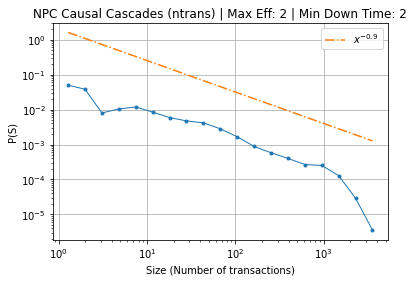

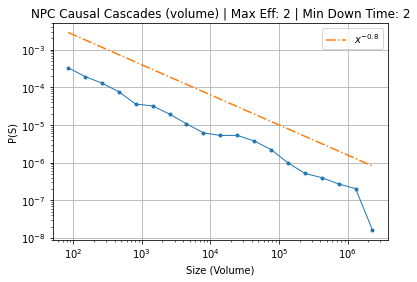

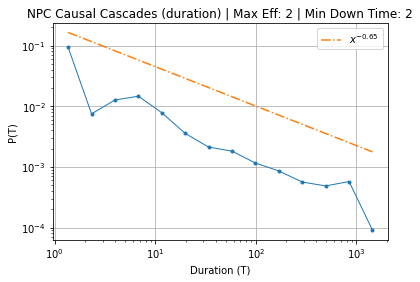

In [10]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*2, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)/10, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.65)/5, '-.', label= "$x^{-0.65}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

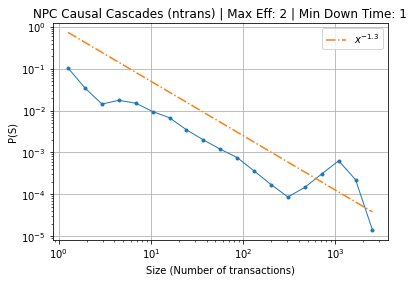

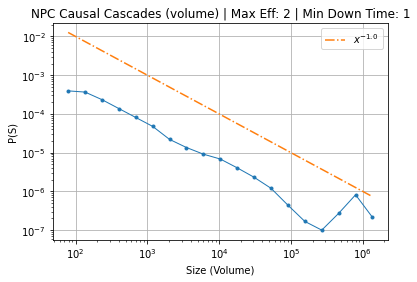

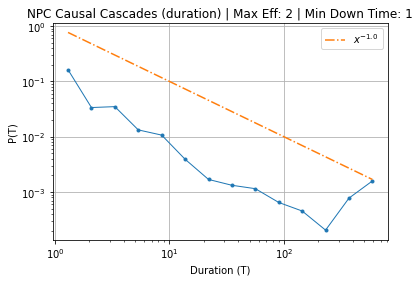

In [9]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3), '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

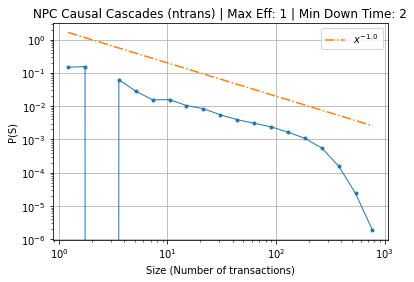

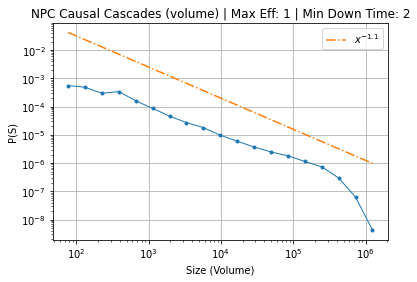

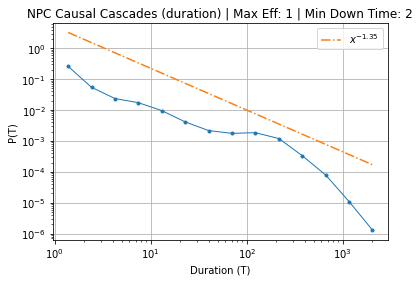

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

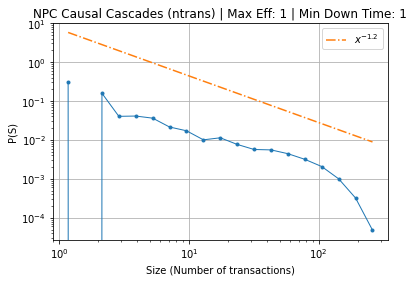

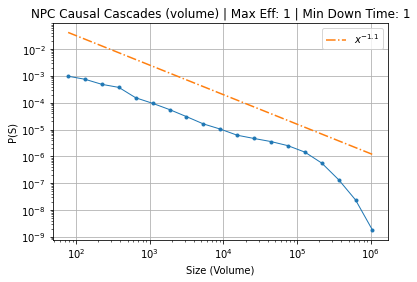

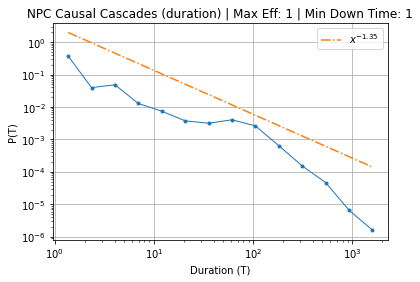

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [6]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
